In [1]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

In [2]:
opposite_dereg_mask = merged_results['Gene'].isin(['C13178', 'E24277', 'B13640', 'D14872', 'C20977', 'B00660', 'C18645', 'B21582', 
                                                   'E20251', 'B13354', 'A18469', 'C16863', 'C07821'])
opposite_dereg = merged_results[opposite_dereg_mask]

'''opposite_dereg["order"] = opposite_dereg.iloc[:, 4:13].mean(axis=1)
opposite_dereg = opposite_dereg.sort_values(by='order')'''

print(opposite_dereg)


    Unnamed: 0    Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  \
1            1  E20251     TF136             -  -1.22  -0.70   0.00   0.22   
3            3  C18645     TF121         ARO80   0.84   0.00   0.00  -0.28   
7            7  D14872     TF034             -  -2.15  -0.64   1.30   1.40   
10          10  E24277     TF049             -   0.43   0.00   0.00  -0.24   
14          14  B00660     TF003             -  -0.98  -0.62   0.50   0.61   
15          15  B21582     TF095          MHY1  -1.15  -0.84   0.00   0.18   
21          21  C07821     TF015             -   0.68   0.58  -0.80  -1.30   
30          30  C20977     TF141             -  -0.81   0.00   0.00   0.47   
41          41  B13354     TF105          AP-4  -0.37  -0.37   0.00   0.23   
45          45  C13178     TF019             -  -0.43   0.00   0.00   0.37   
53          53  A18469     TF099          HOY1  -0.41  -0.68   0.42   0.48   
62          62  B13640     TF008        RIM101  -0.20   0.00   0

In [3]:
opposite_dereg['HSS_sum'] = opposite_dereg['scSoA'] + opposite_dereg['scYFP']
opposite_dereg['UPR_sum'] = opposite_dereg['inYFP'] + opposite_dereg['scTlG']
opposite_dereg = opposite_dereg.sort_values(by=['HSS_sum'])
opposite_dereg.drop(['KO_inRedStar', 'KO_normalized_inRedStar'], axis=1, inplace=True)
print(opposite_dereg)

    Unnamed: 0    Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  \
7            7  D14872     TF034             -  -2.15  -0.64   1.30   1.40   
15          15  B21582     TF095          MHY1  -1.15  -0.84   0.00   0.18   
1            1  E20251     TF136             -  -1.22  -0.70   0.00   0.22   
14          14  B00660     TF003             -  -0.98  -0.62   0.50   0.61   
53          53  A18469     TF099          HOY1  -0.41  -0.68   0.42   0.48   
30          30  C20977     TF141             -  -0.81   0.00   0.00   0.47   
41          41  B13354     TF105          AP-4  -0.37  -0.37   0.00   0.23   
63          63  C16863     TF022          SKO1  -0.26  -0.28   0.00   0.38   
45          45  C13178     TF019             -  -0.43   0.00   0.00   0.37   
62          62  B13640     TF008        RIM101  -0.20   0.00   0.29   0.30   
10          10  E24277     TF049             -   0.43   0.00   0.00  -0.24   
3            3  C18645     TF121         ARO80   0.84   0.00   0

C:\Users\User\AppData\Local\Temp\ipykernel_77496\289249161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opposite_dereg['HSS_sum'] = opposite_dereg['scSoA'] + opposite_dereg['scYFP']
C:\Users\User\AppData\Local\Temp\ipykernel_77496\289249161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opposite_dereg['UPR_sum'] = opposite_dereg['inYFP'] + opposite_dereg['scTlG']


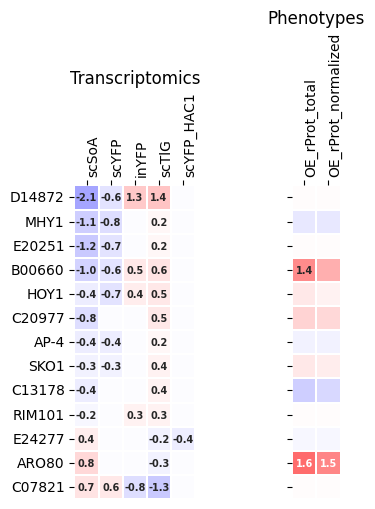

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = opposite_dereg.iloc[:, 4:9]
numeric_data2 = opposite_dereg.iloc[:, 9:11]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(opposite_dereg['Assigned name'], opposite_dereg['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 5.2), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_rProt_total': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_rProt_normalized': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in opposite_dereg['TF number'].values:
            annot_data2.loc[opposite_dereg['TF number'] == gene, column] = numeric_data2.loc[opposite_dereg['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, xticklabels=True, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws,
            vmin=-4.5, vmax=6, cbar_kws={'format': '%.1f'})
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, xticklabels=True, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws,
            vmin=0, vmax=2, cbar_kws={'format': '%.1f'})
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')


# Adjust the layout
plt.tight_layout()
#plt.savefig('subheatmap_opposite_wo_KO.png')
